In [1]:
import h5py  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# Preprocessing

In [2]:
#If using GPU.
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
#read database.
f = h5py.File('GWdatabase.h5','r')   
f.keys()   

<KeysViewHDF5 ['reduced_data', 'waveforms', 'yeofrho']>

In [4]:
#create a list that contains all the failure cases.
fail_num = []
index = 0
for item in f['reduced_data']['tbounce(s)']:
    if(item == -1):
        fail_num.append(index)
    index += 1
fail_case = []
for index in fail_num:
    fail_case.append([f['reduced_data']['A(km)'][index],f['reduced_data']['omega_0(rad|s)'][index],f['reduced_data']['EOS'][index]])
fail_list= []
for item in fail_case:
    tmp = str(item[2]).split("b'")[1].split("'")[0]
    tmp = "A" + str(int(item[0])) + "w" + str(item[1]) + "0_" + tmp
    fail_list.append(tmp)    

In [5]:
#A_num is the list of all the cases that have the particular A value
A_num = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(float(item.split('_')[0].split('w')[0].split('A')[1]) == 467):
         if(str(item.split('_')[1]) != 'LS375'):
            A_num.append(index)
    index+=1
len(A_num)

1670

# Choose which label we want to predict 

In [6]:
#get the label of EOS.
labels = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(index in A_num):
            labels.append(str(item.split('_')[1]))
    index += 1

In [ ]:
labels = np.where(labels == "BHBL", "B", labels)
labels = np.where(labels == "BHBLP", "B", labels)
labels = np.where(labels == "GShenFSU1.7", "G", labels)
labels = np.where(labels == "GShenFSU2.1", "G", labels)
labels = np.where(labels == "GShenNL3", "G", labels)
labels = np.where(labels == "HSDD2", "B", labels)
labels = np.where(labels == "HSFSG", "B", labels)
labels = np.where(labels == "HSIUF", "B", labels)
labels = np.where(labels == "HSNL3", "B", labels)
labels = np.where(labels == "HSTM1", "B", labels)
labels = np.where(labels == "HSTMA", "B", labels)
labels = np.where(labels == "HShen", "H", labels)
labels = np.where(labels == "HShenH", "H", labels)
labels = np.where(labels == "LS180", "L", labels)
labels = np.where(labels == "LS220", "L", labels)
labels = np.where(labels == "LS375", "L", labels)
labels = np.where(labels == "SFHo", "B", labels)
labels = np.where(labels == "SFHx", "B", labels)

In [ ]:
labels = np.where(labels == "BHBL", "B", labels)
labels = np.where(labels == "BHBLP", "B", labels)
labels = np.where(labels == "GShenFSU1.7", "G", labels)
labels = np.where(labels == "GShenFSU2.1", "G", labels)
labels = np.where(labels == "GShenNL3", "G", labels)
labels = np.where(labels == "HSDD2", "B", labels)
labels = np.where(labels == "HSFSG", "B", labels)
labels = np.where(labels == "HSIUF", "B", labels)
labels = np.where(labels == "HSNL3", "B", labels)
labels = np.where(labels == "HSTM1", "B", labels)
labels = np.where(labels == "HSTMA", "B", labels)
labels = np.where(labels == "HShen", "H", labels)
labels = np.where(labels == "HShenH", "H", labels)
labels = np.where(labels == "LS180", "L", labels)
labels = np.where(labels == "LS220", "L", labels)
labels = np.where(labels == "LS375", "L", labels)
labels = np.where(labels == "SFHo", "B", labels)
labels = np.where(labels == "SFHx", "B", labels)

In [8]:
#signal preprocessing used by the paper.(We don't need it.)
from scipy import signalnp.unique
from scipy.fft import fft, fftshift

<ipython-input-13-a115cb7ecb5e>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 4), dpi=64)


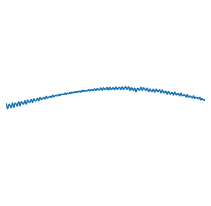

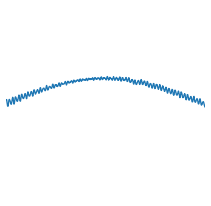

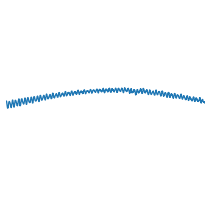

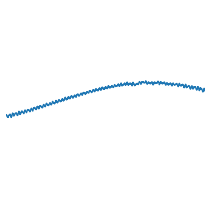

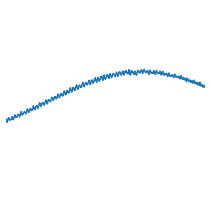

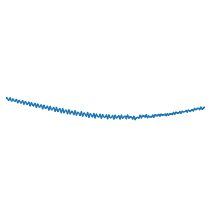

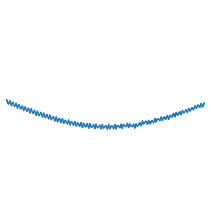

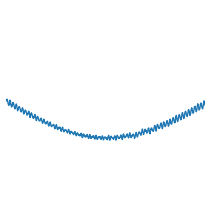

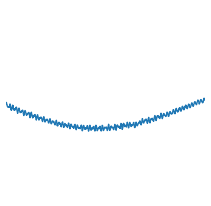

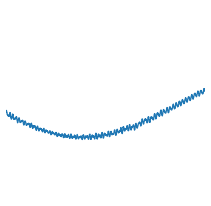

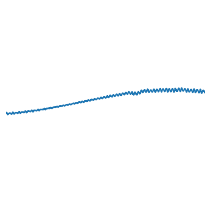

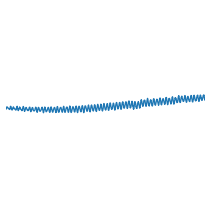

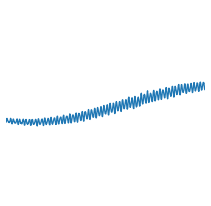

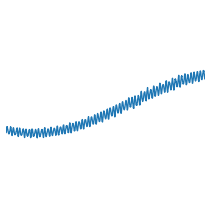

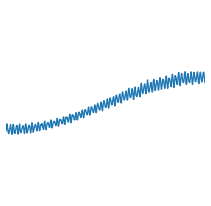

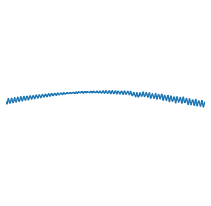

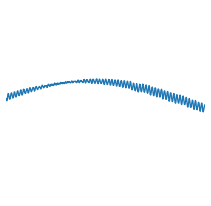

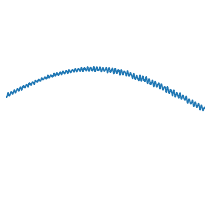

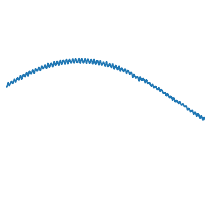

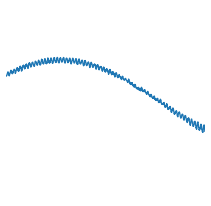

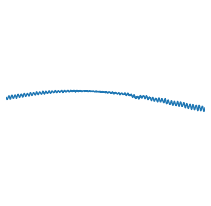

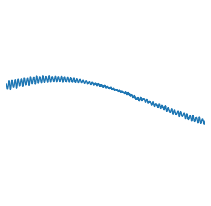

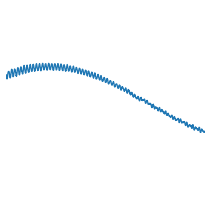

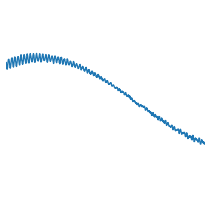

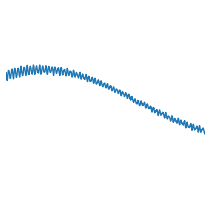

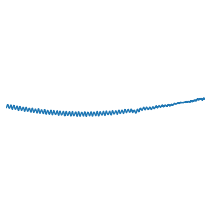

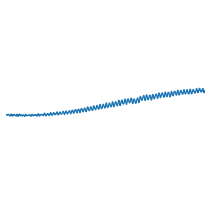

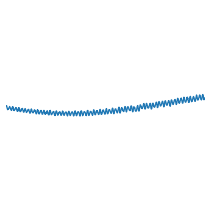

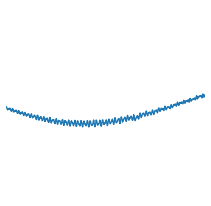

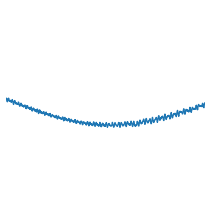

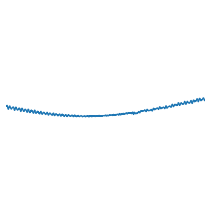

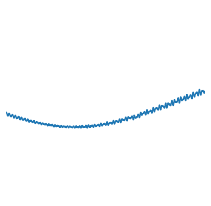

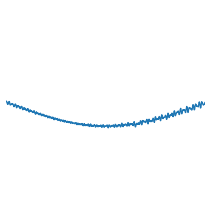

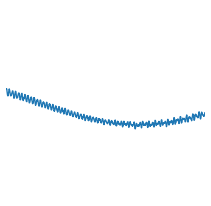

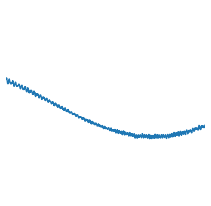

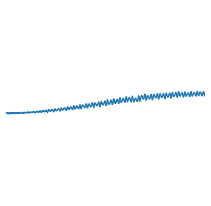

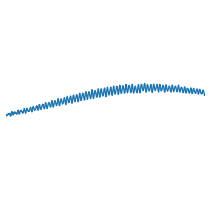

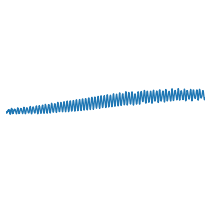

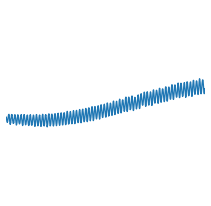

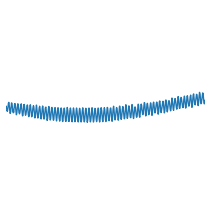

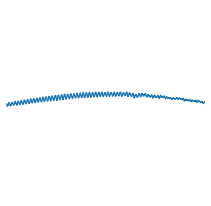

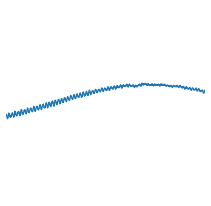

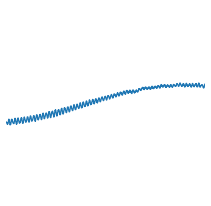

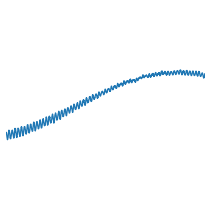

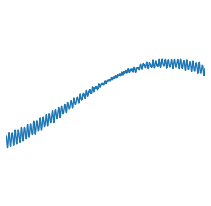

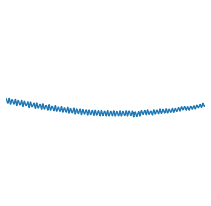

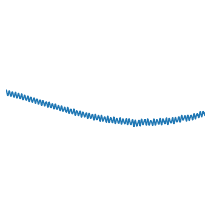

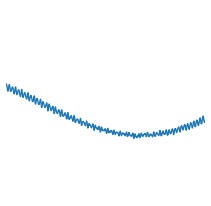

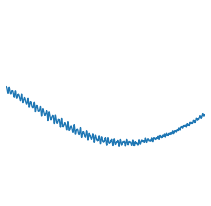

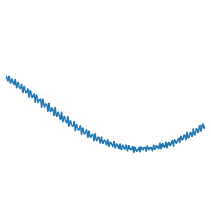

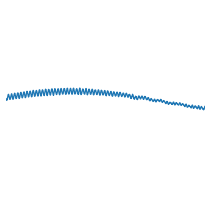

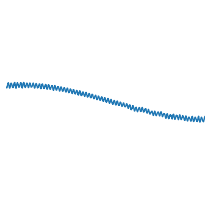

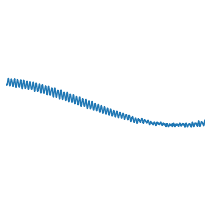

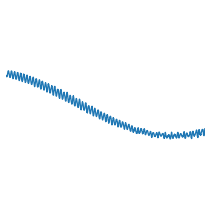

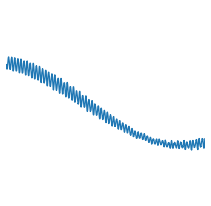

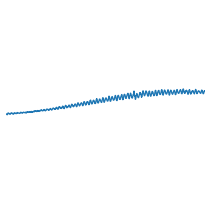

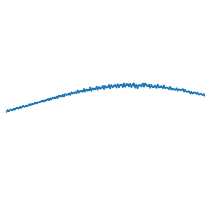

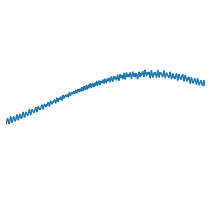

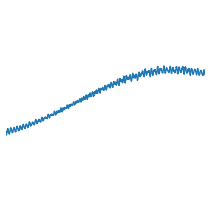

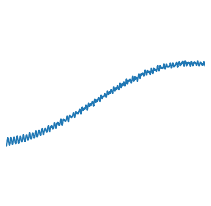

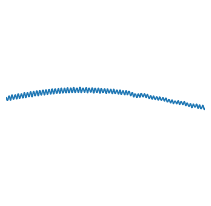

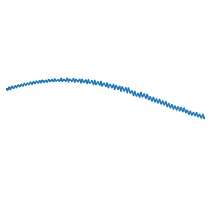

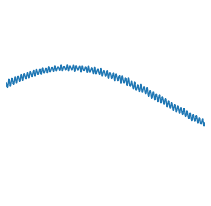

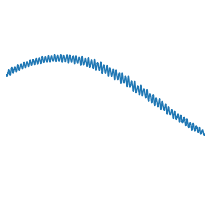

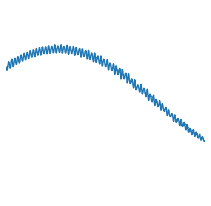

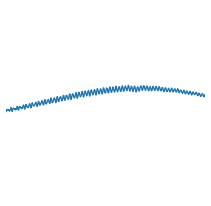

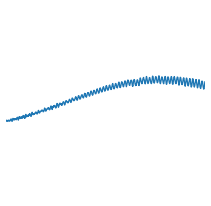

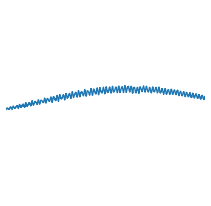

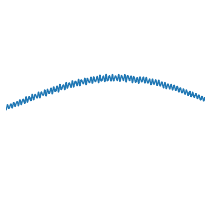

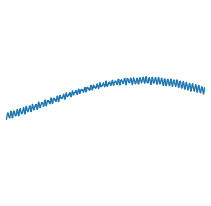

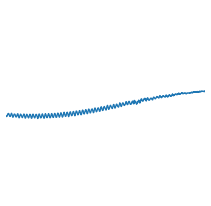

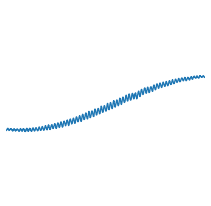

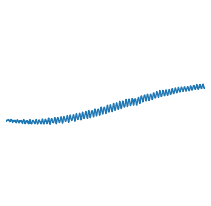

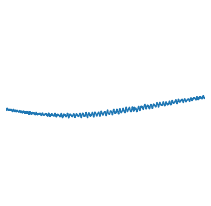

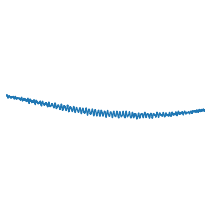

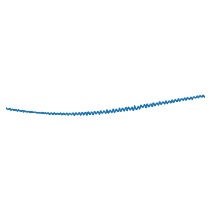

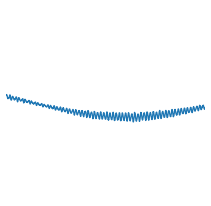

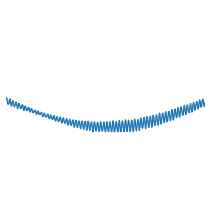

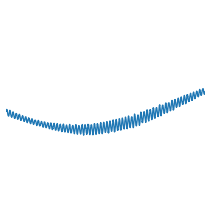

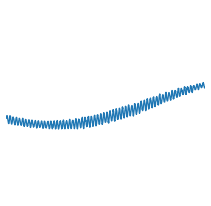

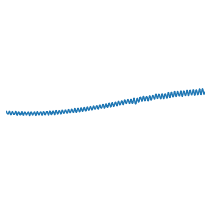

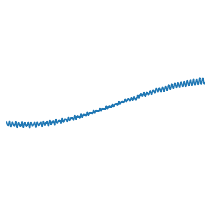

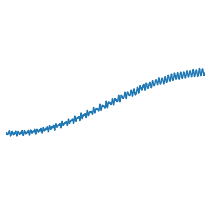

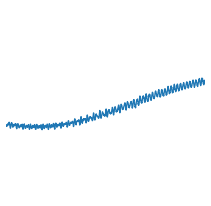

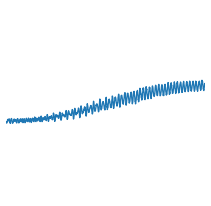

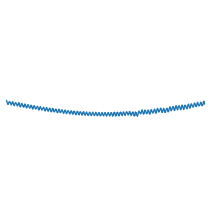

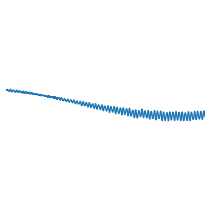

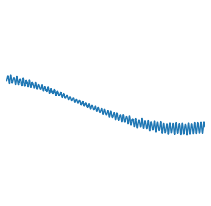

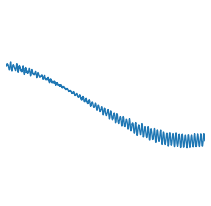

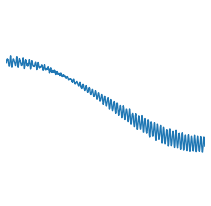

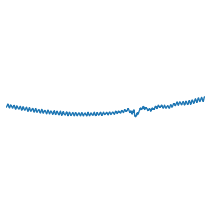

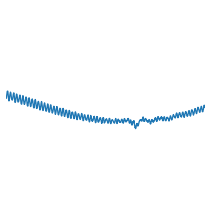

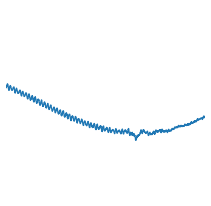

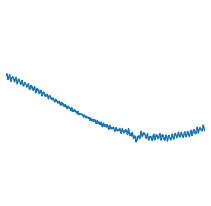

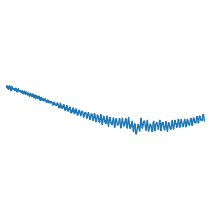

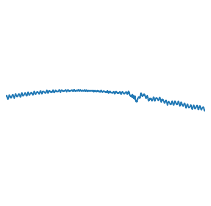

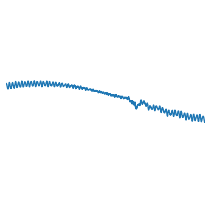

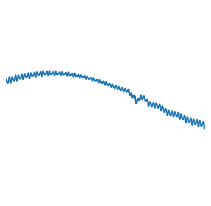

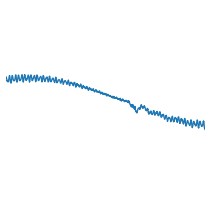

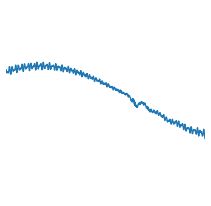

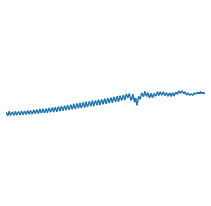

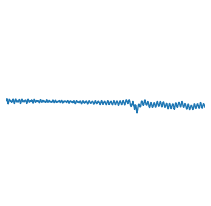

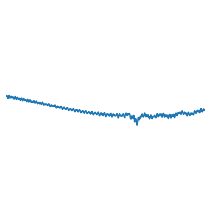

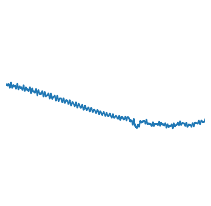

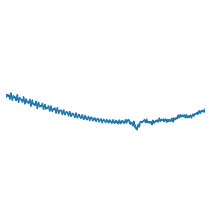

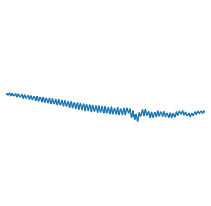

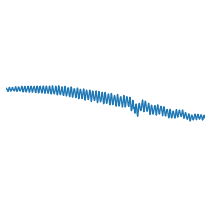

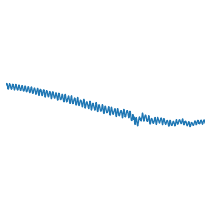

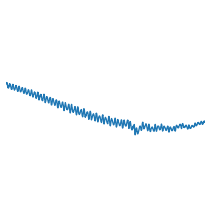

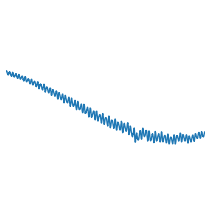

Error in callback <function flush_figures at 0x7f3661effee0> (for post_execute):


KeyboardInterrupt: 

In [13]:
#draw the image which is 256*256.
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #for j in range(5):
        x = f['waveforms'][item]['t-tb(s)']
        y = f['waveforms'][item]['strain*dist(cm)']
        y = np.array(y)
        x = np.array(x)
#         window = signal.tukey(len(y),0.1)
#         y = y * window
#         b, a = signal.butter(10, 0.25, 'lowpass')
#         y = signal.filtfilt(b, a, y)
        #y = signal.resample(y, int(len(y)/16))
        #num_resample = len(y)
        #new_x = []
        #for j in range(num_resample):
            #new_x.append(x[j*16])
        #for j in range(5):
            #tmp = np.random.choice(67108864-14986, 1)
            #aug_data = noise[tmp[0] :tmp[0] + len(y)]*1e20
            #y = y + aug_data
        plt.figure(figsize=(4, 4), dpi=64)
        plt.plot(x,y/3.08567758e22*1e21)
        plt.xlim(-0.01, 0.006)
        plt.ylim(-20, 20)
        plt.axis('off')
            #title = "./Final_aug/" + str(index) + "_" + str(j) + ".jpeg"
        title = "./Final_tbounce/" + str(index) + ".jpeg"
        plt.savefig(title,dpi=64)
    index += 1

# Get data 

In [8]:
#read image data.
from PIL import Image
import numpy as np
data = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(index in A_num):
            title = 'Final_tbounce/'+ str(index) + '.jpeg'
            image = Image.open(title).convert('L')
            data.append(np.array(image))
    index += 1

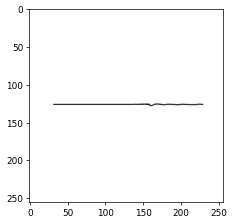

In [9]:
#check the data.
plt.figure(figsize=(4, 4), dpi=64)
plt.imshow(data[5], cmap='gray')

In [10]:
#transform the data type to numpy array
data = np.array(data)
data.shape

(1764, 256, 256)

# Model

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K
import os
import gc

In [12]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.15,random_state=5)

In [13]:
X_train.shape

(1499, 256, 256)

In [14]:
#transfer the data shape for model training
X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 1)

In [15]:
#using one hot to encode the label.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [16]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Concatenate
from keras.models import Model

In [17]:
#our model
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(256, 256, 1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [17]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)

94/94 [==============================] - 13s 82ms/step - loss: 3.7903 - acc: 0.2444 - val_loss: 1.6114 - val_acc: 0.3321


In [ ]:
#if the GPU is out of memory while testing, we may need to save the trained model, restart, then load the model. 
model.save('model_GW_A92%.h5')

In [18]:
model = keras.models.load_model('model_GW_A92%.h5')

In [19]:
#check the accuracy.
answer = np.argmax(model.predict(X_test), axis=1)
answer_onehot = np.zeros((answer.size, answer.max()+1))
answer_onehot[np.arange(answer.size),answer] = 1
answer_decode = label_decode(label_encoder, answer_onehot)
y_test_tmp = label_decode(label_encoder, y_test)
index = 0
correct = 0
for item in answer_decode:
    if(item == y_test_tmp[index]):
        correct += 1
    else:
        #print the wrong answer case.
        print(index)
    index += 1
correct/index

9
13
22
26
52
54
57
72
85
100
116
120
132
142
144
148
149
200
202
241


0.9245283018867925

In [22]:
#set the axis for Confusion Matrix.
tmp_labels = np.array([ 0.0 ,  0.5,  1.0 ,  1.5,  2.0 ,  2.5,  3.0 ,  3.5,  4.0 ,  4.5,  5.0 ,
        5.5,  6.0 ,  6.5,  7.0 ,  7.5,  8.0 ,  8.5,  9.0 ,  9.5, 10.0 , 10.5,
       11.0 , 11.5, 12.0 , 12.5, 13.0 , 13.5, 14.0 , 14.5, 15.0 , 15.5]).astype('str')

In [20]:
tmp_labels = np.array(['300', '467', '634', '1268', '10000']).astype('str')

In [23]:
tmp_labels = np.array(['L', 'G', 'H', 'B']).astype('str')

<AxesSubplot:>

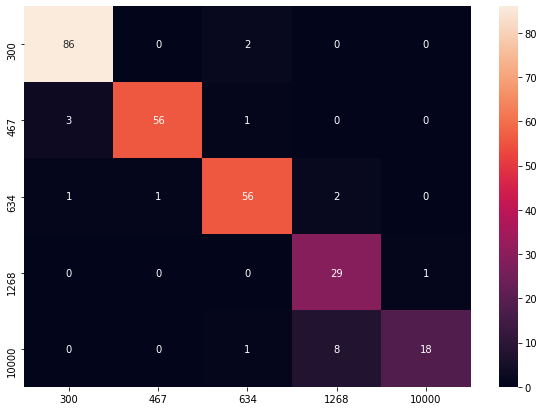

In [21]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_tmp, answer_decode, labels=tmp_labels)
import itertools
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
tmp = tmp_labels
df_cm = pd.DataFrame(cm, index = [i for i in tmp],
                  columns = [i for i in tmp])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('EOS_CM_99.6%.png')